In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

ANALISIS EXPLORATORIO DE DATOS DATAFRAME UNIDO

In [2]:
reviews = pd.read_parquet('ETLreviews.parquet')
reviews.head(2)

,funny,posted,last_edited,item_id,helpful,recommend,user_id,user_url,sentiment_analysis
0,,2011-11-05,,1250,No ratings yet,True,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2
1,,2011-07-15,,22200,No ratings yet,True,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2


NECESITO CON EL FIN DE CREAR LAS FUNCIONES SOLICITADAS OBTENER EL AÑO DEL REVIEW SE EXTRAE EL AÑO EN LA COLUMNA POSTED_YEAR Y SE ELIMINA LA COLUMNA POSTED

In [6]:
reviews['posted'] = pd.to_datetime(reviews['posted'], format='%Y-%m-%d', errors='coerce')
reviews['posted_year'] = reviews['posted'].dt.year
reviews['posted_year'] = reviews['posted_year'].astype('Int64')
reviews['posted_year'].fillna(0, inplace=True)
reviews.drop(columns=['posted'], inplace=True)

In [189]:
reviews.head(2)

,item_id,recommend,user_id,sentiment_analysis,posted_year
0,1250,True,76561197970982479,2,2011
1,22200,True,76561197970982479,2,2011


ELIMINO COLUMNAS INNECESARIAS PARA EL PROYECTO COMO FUNNY, LAST_EDITED, HELPFUL Y USER_URL

In [17]:
reviews.drop(columns=['funny'], inplace=True)
reviews.drop(columns=['last_edited'], inplace=True)
reviews.drop(columns=['helpful'], inplace=True)
reviews.drop(columns=['user_url'], inplace=True)

In [18]:
reviews.head(2)

,item_id,recommend,user_id,sentiment_analysis,posted_year
0,1250,True,76561197970982479,2,2011
1,22200,True,76561197970982479,2,2011


In [19]:
reviews.to_parquet('ETLreviews.parquet', engine = 'pyarrow')

ANALISIS EXPLORATORIO DE DATOS DATAFRAME ITEMS

In [3]:
items = pd.read_parquet('ETLitems.parquet')
items.head(2)

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,user_url
0,10,Counter-strike,6,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team fortress classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


ELIMINO COLUMNAS INNECESARIAS PARA EL PROYECTO COMO PLAYTIME_2WEEKS, ITEMS_COUNT, STEAM_ID, USER_ID, USER_URL

In [27]:
items.drop(columns=['playtime_2weeks'], inplace=True)
items.drop(columns=['items_count'], inplace=True)
items.drop(columns=['steam_id'], inplace=True)
items.drop(columns=['user_id'], inplace=True)
items.drop(columns=['user_url'], inplace=True)

In [28]:
items.head(2)

,item_id,item_name,playtime_forever
0,10,Counter-strike,6
1,20,Team fortress classic,0


In [145]:
items.to_parquet('ETLitems.parquet', engine = 'pyarrow')

ANALISIS EXPLORATORIO DE DATOS DATAFRAME GAMES

In [4]:
games = pd.read_parquet('ETLgames.parquet')
games.head(2)

,genres,publisher,app_name,title,price,item_id,developer,items_count,metascore,free_play,release_year
0,Action,Kotoshiro,Lost summoner kitty,Lost summoner kitty,4.99,761140,Kotoshiro,None,0.0,Sin Dato,2018
1,Casual,Kotoshiro,Lost summoner kitty,Lost summoner kitty,4.99,761140,Kotoshiro,None,0.0,Sin Dato,2018


ELIMINO COLUMNAS INNECESARIAS PARA EL PROYECTO COMO PUBLISHER, APP_NAME, ITEMS_COUNT, METASCORE, FREE_PLAY

In [33]:
games.drop(columns=['publisher'], inplace=True)
games.drop(columns=['app_name'], inplace=True)
games.drop(columns=['items_count'], inplace=True)
games.drop(columns=['metascore'], inplace=True)
games.drop(columns=['free_play'], inplace=True)

In [34]:
games.tail(2)

,genres,title,price,item_id,developer,release_year
70701,Casual,Exit 2 - directions,4.99,658870,"Xropi,stev3ns",2017
70702,Indie,Exit 2 - directions,4.99,658870,"Xropi,stev3ns",2017


In [35]:
games.to_parquet('ETLgames.parquet', engine = 'pyarrow')

In [117]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70703 entries, 0 to 70702
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        70703 non-null  object 
 1   title         70703 non-null  object 
 2   price         70703 non-null  float64
 3   item_id       70703 non-null  int64  
 4   developer     70703 non-null  object 
 5   release_year  70703 non-null  Int64  
dtypes: Int64(1), float64(1), int64(1), object(3)
memory usage: 3.3+ MB


DESEO TENER EN UN SOLO DATAFRAME LAS HORAS TOTALES DE JUEGO Y PARA TAL FIN AGRUPO POR ITEM_ID Y SUMO PLAYTIME_FOREVER DEL DATAFRAME ITEMS PARA LOGRAR ESE FIN

In [207]:
games_reviews = pd.merge(games, reviews, on='item_id', how='inner')

In [204]:
resultados = items.groupby('item_id')['playtime_forever'].sum().reset_index()
games_reviews_items = pd.merge(games_reviews, resultados, on='item_id', how='inner')

In [205]:
games_reviews_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113963 entries, 0 to 113962
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   genres              113963 non-null  object 
 1   title               113963 non-null  object 
 2   price               113963 non-null  float64
 3   item_id             113963 non-null  object 
 4   developer           113963 non-null  object 
 5   release_year        113963 non-null  Int64  
 6   recommend           113963 non-null  bool   
 7   user_id             113963 non-null  object 
 8   sentiment_analysis  113963 non-null  int64  
 9   posted_year         113963 non-null  int64  
 10  playtime_forever    113963 non-null  int64  
dtypes: Int64(1), bool(1), float64(1), int64(3), object(5)
memory usage: 8.9+ MB


In [202]:
games_reviews_items.isnull().sum()

genres                0
title                 0
price                 0
item_id               0
developer             0
release_year          0
recommend             0
user_id               0
sentiment_analysis    0
posted_year           0
playtime_forever      0
dtype: int64

In [192]:
games_reviews_items.head(2)

,genres,title,price,item_id,developer,release_year,recommend,user_id,sentiment_analysis,posted_year,playtime_forever
0,Action,Counter-strike,9.99,10,Valve,2000,True,mixadance,2,2012,7487362
1,Action,Counter-strike,9.99,10,Valve,2000,True,cumme,1,2015,7487362


In [193]:
games_reviews_items.tail(2)

,genres,title,price,item_id,developer,release_year,recommend,user_id,sentiment_analysis,posted_year,playtime_forever
113961,Free to play,Puzzle pirates,0.0,99910,Three rings,2011,True,WhenWeWereYoungggg,2,2012,360674
113962,Strategy,Puzzle pirates,0.0,99910,Three rings,2011,True,Jezza453,0,2015,360674


In [203]:
games_reviews_items.to_parquet('games_reviews_items.parquet', engine = 'pyarrow')

ANALISIS EXPLORATORIO DE DATOS ESTADISTICA DESCRIPTIVA

In [195]:
games_reviews_items.shape

(113963, 11)

In [197]:
games_reviews_items.describe()

,price,release_year,sentiment_analysis,posted_year,playtime_forever
count,113963.000000,113963.0,113963.000000,113963.000000,1.139630e+05
mean,13.359014,2013.073936,1.339803,1644.352772,3.221878e+07
std,14.686912,2.852285,0.822106,779.875094,6.408265e+07
min,0.000000,1989.0,0.000000,0.000000,0.000000e+00
25%,0.000000,2012.0,1.000000,2013.000000,9.056700e+05
50%,9.990000,2013.0,2.000000,2014.000000,6.213503e+06
75%,19.990000,2015.0,2.000000,2015.000000,3.000027e+07
max,771.710000,2017.0,2.000000,2015.000000,2.937570e+08


LOS AÑOS DE LA COLUMNA POSTED_YEAR QUE APARECEN COMO CERO SON AQUELLOS CAMPOS SIN DATO

ENTENDIENDO LA DISTRIBUCION DE LOS VALORES DE LA COLUMNA DE SENTIMENT_ANALYSIS

In [208]:
counts = games_reviews_items['sentiment_analysis'].value_counts()
total_records = len(games_reviews_items)
porcentaje_0 = (counts.get(0, 0) / total_records) * 100  # Porcentaje de calificación 0
porcentaje_1 = (counts.get(1, 0) / total_records) * 100  # Porcentaje de calificación 1
porcentaje_2 = (counts.get(2, 0) / total_records) * 100  # Porcentaje de calificación 2

print(f'Porcentaje de calificación 0: {porcentaje_0}%')
print(f'Porcentaje de calificación 1: {porcentaje_1}%')
print(f'Porcentaje de calificación 2: {porcentaje_2}%')

Porcentaje de calificación 0: 22.575748269175083%
Porcentaje de calificación 1: 20.8681765134298%
Porcentaje de calificación 2: 56.55607521739512%


LA MAYOR CANTIDAD DE COMENTARIOS SON POSITIVOS HACIA LOS JUEGOS

In [206]:
counts = games_reviews_items['release_year'].value_counts().head(5)
for year, count in counts.items():
    print(f'Año {year}: {count} titulos publicados')


Año 2013: 21425 titulos publicados
Año 2015: 17997 titulos publicados
Año 2014: 17043 titulos publicados
Año 2012: 16533 titulos publicados
Año 2017: 10028 titulos publicados


EL AÑO 2013 ES EL DE MAYOR NUMERO DE TITULOS PUBLICADOS

In [200]:
counts = games_reviews_items['recommend'].value_counts()

total_recommendations = len(games_reviews_items['recommend'])

for reco, count in counts.items():
    porcentaje = (count / total_recommendations) * 100
    print(f'Recomendación tipo {reco}: {count} en total ({porcentaje:.2f}% de las recomendaciones)')

Recomendación tipo True: 100005 en total (87.75% de las recomendaciones)
Recomendación tipo False: 13958 en total (12.25% de las recomendaciones)


LA GRAN MAYORIA DE USUARIOS APORTAN RECOMENDACIONES

GRAFICANDO LA COLUMNA GENRES

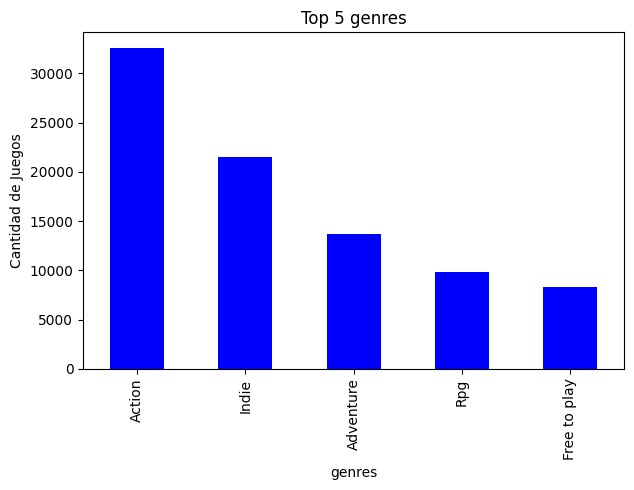

In [222]:
count_genre = games_reviews_items['genres'].value_counts()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
count_genre[:5].plot(kind='bar', color='blue')
plt.xlabel('genres') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 5 genres')
plt.tight_layout()
plt.show()

LOS DESARROLLADORES MAS IMPORTANTES


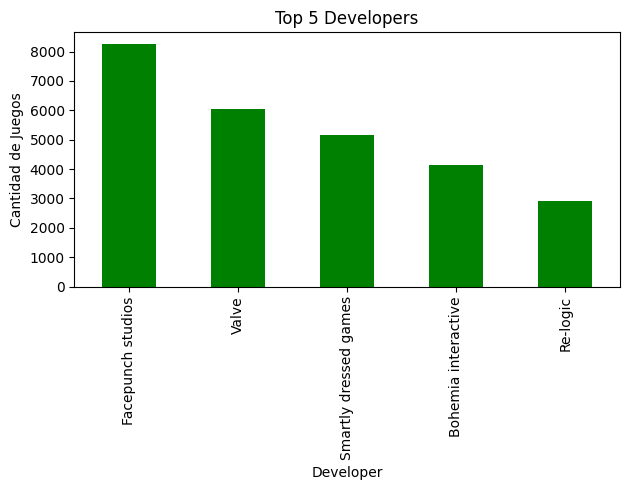

In [221]:
count_developer = games_reviews_items['developer'].value_counts()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
count_developer[:5].plot(kind='bar', color='green')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 5 Developers')
plt.tight_layout()
plt.show()

LOS TITULOS CON MAS PRESENCIA EN EL CONJUNTO DE DATOS

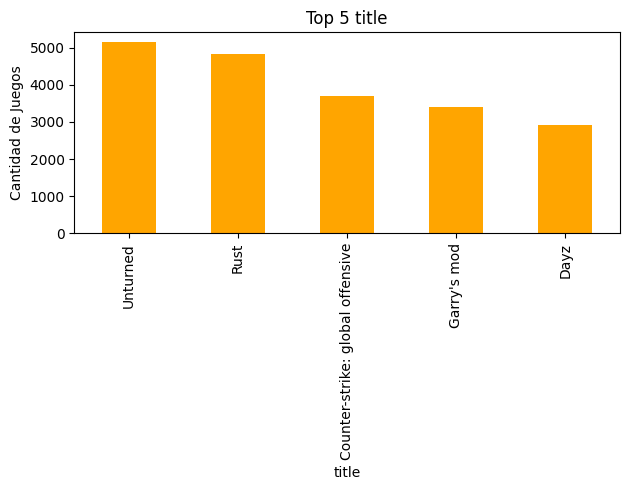

In [217]:
count_title = games_reviews_items['title'].value_counts()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
count_title[:5].plot(kind='bar', color='orange')
plt.xlabel('title') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 5 title')
plt.tight_layout()
plt.show()

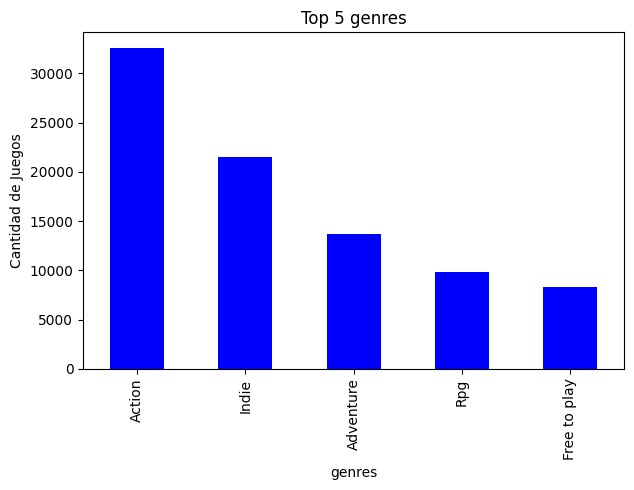

Debes crear las siguientes funciones para los endpoints que se consumirán en la API, recuerden que deben tener un decorador por cada una (@app.get(‘/’)).

def PlayTimeGenre( genero : str ): Debe devolver año con mas horas jugadas para dicho género.
Ejemplo de retorno: {"Año de lanzamiento con más horas jugadas para Género X" : 2013}

def UserForGenre( genero : str ): Debe devolver el usuario que acumula más horas jugadas para el género dado y una lista de la acumulación de horas jugadas por año.
Ejemplo de retorno: {"Usuario con más horas jugadas para Género X" : us213ndjss09sdf, "Horas jugadas":[{Año: 2013, Horas: 203}, {Año: 2012, Horas: 100}, {Año: 2011, Horas: 23}]}

def UsersRecommend( año : int ): Devuelve el top 3 de juegos MÁS recomendados por usuarios para el año dado. (reviews.recommend = True y comentarios positivos/neutrales)
Ejemplo de retorno: [{"Puesto 1" : X}, {"Puesto 2" : Y},{"Puesto 3" : Z}]

def UsersNotRecommend( año : int ): Devuelve el top 3 de juegos MENOS recomendados por usuarios para el año dado. (reviews.recommend = False y comentarios negativos)
Ejemplo de retorno: [{"Puesto 1" : X}, {"Puesto 2" : Y},{"Puesto 3" : Z}]

def sentiment_analysis( año : int ): Según el año de lanzamiento, se devuelve una lista con la cantidad de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento.
Ejemplo de retorno: {Negative = 182, Neutral = 120, Positive = 278}

